Make subplots of maps at a given depth in ASE for difference, warm, and cool composites. 
Plots warm composite T in colors and velocities for diff, warm and cool comps in vectors.

Retrieves the 5th year of data from the warmest runs and coolest runs as defined in Datasets.py.
Plots the mean during the 5th year for the warms, the cools, and the difference between the two. 

In [2]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import Functions_load_output as flo
import Functions_data_analysis as fda
import Functions_plotting as fp
from Datasets import exp_set_dict_warm_order

In [3]:
# Use importlib to reload modules after editing them
import importlib
importlib.reload(fp)

<module 'Functions_plotting' from '/glade/campaign/univ/ulnl0002/Gemma/Analysis/Functions_plotting.py'>

In [4]:
# Set up parameters that will be the same for all analysis

region = 'PIB'
# region = 'ASBS'

# UV depths
depth = -300 # depths should be negative 
exp_set = 'ic_2001'

# Select time period over which to average the velocities / SI
month_start_idx =0
n_months = 12
str_time = 'annual_mean' #For title and filename
# ** idx 47 and 12 months averages over the 5th year J-D ** or 46 and 12 for D-N
# ** start in 46 for getting first DJF season, n_months=3 **

runs = exp_set_dict_warm_order[exp_set]
print('Using runs in this order:\n',runs)
warm_runs = runs[0:4]
cool_runs = runs[4:8]
print('Warm runs:\n',warm_runs,'\nCool runs:\n', cool_runs)

Using runs in this order:
 ['run_forc_erai_1982_rep_ic_2001', 'run_forc_erai_1984_rep_ic_2001', 'run_forc_erai_1989_rep_ic_2001', 'run_forc_erai_1992_rep_ic_2001', 'run_forc_erai_1994_rep_ic_2001', 'run_forc_erai_2003_rep_ic_2001', 'run_forc_erai_2009_rep_ic_2001', 'run_forc_erai_1991_rep_ic_2001', 'run_forc_erai_2015_rep_ic_2001', 'run_forc_erai_2011_rep_ic_2001']
Warm runs:
 ['run_forc_erai_1982_rep_ic_2001', 'run_forc_erai_1984_rep_ic_2001', 'run_forc_erai_1989_rep_ic_2001', 'run_forc_erai_1992_rep_ic_2001'] 
Cool runs:
 ['run_forc_erai_1994_rep_ic_2001', 'run_forc_erai_2003_rep_ic_2001', 'run_forc_erai_2009_rep_ic_2001', 'run_forc_erai_1991_rep_ic_2001']


In [14]:
# Get U and V data
# importlib.reload(fda)

# To do: change function to iterate through different depths rather than regions
prefix = 'state_3d_set2'
warm_U_list, cool_U_list, diff_U_list = fda.load_composite_data('U', [region], warm_runs, cool_runs, \
                                                      prefix, month_start_idx, n_months,depth=depth)

warm_V_list, cool_V_list, diff_V_list = fda.load_composite_data('V', [region], warm_runs, cool_runs, \
                                                      prefix, month_start_idx, n_months,depth=depth)


PIB
Getting U data for all runs...
0
saving date from these times for 1st run:
 [cftime.DatetimeNoLeap(2001, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 3, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 4, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 5, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 7, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 8, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 9, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 10, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 11, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 12, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2002, 1, 1, 0, 0, 0, 0, has_year_zero=True)]
(12, 56, 85)
lat shape, data lat shape: 56 56
lon shape, data lon shape: 84 84
1
(12, 56, 85)
2
(12, 56, 85)
3
(

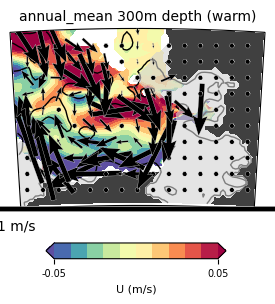

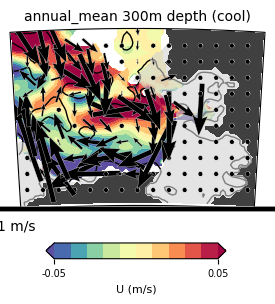

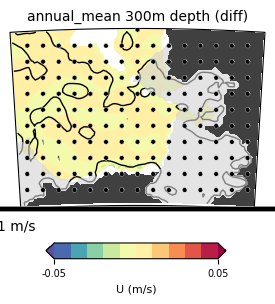

In [15]:
# importlib.reload(fp)

col_levs = np.linspace(-0.05,0.05,11)

fig_name = None

# warm plot
fp.make_contour_map('U', warm_U_list[0], col_levs, 'Spectral_r',region,\
                    title=str_time+' '+str(abs(depth))+'m depth (warm)',save=fig_name,\
                    data_x = warm_U_list[0], data_y = warm_V_list[0],quiv_vname='U')

# cool plot
fp.make_contour_map('U', cool_U_list[0], col_levs, 'Spectral_r',region,\
                    title=str_time+' '+str(abs(depth))+'m depth (cool)',save=fig_name,\
                    data_x = cool_U_list[0], data_y = cool_V_list[0],quiv_vname='U')

# diff plot
fp.make_contour_map('U', diff_U_list[0], col_levs, 'Spectral_r',region,\
                    title=str_time+' '+str(abs(depth))+'m depth (diff)',save=fig_name,\
                    data_x = diff_U_list[0], data_y = diff_V_list[0],quiv_vname='U')


In [27]:
len(warm_U_list[0])

56

In [ ]:
# importlib.reload(fp)

col_levs = np.linspace(-0.05,0.05,11)

fig_name = None

# warm plot
fp.make_contour_map('U', warm_U_list[0], col_levs, 'Spectral_r',region,\
                    title=str_time+' '+str(abs(depth))+'m depth (warm)',save=fig_name,\
                    data_x = warm_U_list[0], data_y = warm_V_list[0],quiv_vname='U')

# cool plot
fp.make_contour_map('U', cool_U_list[0], col_levs, 'Spectral_r',region,\
                    title=str_time+' '+str(abs(depth))+'m depth (cool)',save=fig_name,\
                    data_x = cool_U_list[0], data_y = cool_V_list[0],quiv_vname='U')

# diff plot
fp.make_contour_map('U', diff_U_list[0], col_levs, 'Spectral_r',region,\
                    title=str_time+' '+str(abs(depth))+'m depth (diff)',save=fig_name,\
                    data_x = diff_U_list[0], data_y = diff_V_list[0],quiv_vname='U')
